<a href="https://colab.research.google.com/github/SaiTulasi69/Acute-Ischemic-Stroke-Prediction/blob/main/Acute_Ischemic_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the dataset: https://docs.google.com/spreadsheets/d/1cNZF7WZMC8EilYWb8W6Ak1R6nNdk-jPgEjusff2Lj7k/edit#gid=741312261

# Importing Libraries

In [1]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 21.8 MB 6.7 MB/s 
     |████████████████████████████████| 10.9 MB 7.1 MB/s 
     |████████████████████████████████| 596 kB 16.6 MB/s 
     |████████████████████████████████| 102 kB 38.2 MB/s 
     |████████████████████████████████| 690 kB 37.1 MB/s 
     |████████████████████████████████| 4.7 MB 39.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 34.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=bed704dfdc7cc802bed7f81eb0abdbe348b8e16752915bfa244be90be2ac534c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6y9f64on/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=335e90bae12269572bfcfcf11a328c3ecad85fd85405736e565eb5bfdf242afd
  Stored in directory: /ro

In [2]:
pip install pandas-profiling[notebook]

In [3]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.5 MB/s 


In [4]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
%matplotlib inline
import sweetviz as sv

# Importing Data

In [5]:
# loading the dataset from a github URL
url = 'https://raw.githubusercontent.com/SaiTulasi69/Acute-Ischemic-Stroke-Prediction/main/Acute%20Ischemic%20Stroke%20Prediction/Acute%20Ischemic%20Stroke%20Dataset%20(CSV).csv'
df = pd.read_csv(url)

In [6]:
# to get a glance of how the dataset actually looks like
df.head(10)

,Sl. No.,Patient ID,Name,Age,Sex,Lesion,GCS,Serum Albumin,SSS Score,Stroke Severity,...,Addictions,Com_A,Com_B,Com_C,Com_D,Com_E,Com_F,Add_N,Add_S,Add_L
0,1.0,20577.0,SAYAVVI,70.0,F,1.0,5.0,4.2,6.0,Severe,...,N,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,20578.0,CHANDRA,70.0,F,4.0,14.0,4.2,30.0,Moderate,...,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,20579.0,INDU,60.0,F,2.0,11.0,3.6,32.0,Moderate,...,S,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,20580.0,KAVU,70.0,F,1.0,5.0,4.2,10.0,Severe,...,N,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,20581.0,LAKSHMI,55.0,F,1.0,9.0,3.2,14.0,Severe,...,N,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6.0,20582.0,KAMALA,85.0,F,2.0,9.0,2.6,4.0,Severe,...,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,7.0,20583.0,H LAKSHMI,63.0,F,2.0,15.0,4.2,26.0,Moderate,...,N,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8.0,20584.0,THULASI,58.0,F,1.0,9.0,4.1,20.0,Severe,...,N,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,9.0,20585.0,SHALLU,85.0,F,1.0,5.0,3.8,2.0,Severe,...,N,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10.0,20586.0,ZABBERUNIKA,37.0,F,1.0,7.0,2.7,12.0,Severe,...,N,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
# use this in case the github URL fails to load the dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# in case the git link dataset fails to load, use the below code after uploading the CSV file in sample data folder in GDrive
#df = pd.read_csv("/content/sample_data/Acute Ischemic Stroke Dataset - Sheet1.csv")#'/content/sample_data/Acute Ischemic Stroke Dataset (CSV).csv')

In [9]:
# to rename all the column names
df.rename(columns={'Serum Albumin': 'Serum_Albumin', 'SSS Score': 'SSS_Score', 'MRS Score':'MRS_Score','Patient ID': 'Patient_ID','Sl. No.':'Sl_No',
                   'Stroke Severity': 'Stroke_Severity','Comorbid Conditions':'Comorbid_Conditions'}, inplace=True)

In [10]:
# to verify if the column names have changed
df.head()

,Sl_No,Patient_ID,Name,Age,Sex,Lesion,GCS,Serum_Albumin,SSS_Score,Stroke_Severity,...,Addictions,Com_A,Com_B,Com_C,Com_D,Com_E,Com_F,Add_N,Add_S,Add_L
0,1.0,20577.0,SAYAVVI,70.0,F,1.0,5.0,4.2,6.0,Severe,...,N,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,20578.0,CHANDRA,70.0,F,4.0,14.0,4.2,30.0,Moderate,...,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,20579.0,INDU,60.0,F,2.0,11.0,3.6,32.0,Moderate,...,S,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,20580.0,KAVU,70.0,F,1.0,5.0,4.2,10.0,Severe,...,N,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,20581.0,LAKSHMI,55.0,F,1.0,9.0,3.2,14.0,Severe,...,N,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
# shows the correlation of each column against one another
df.corr()

,Sl_No,Patient_ID,Age,Lesion,GCS,Serum_Albumin,SSS_Score,MRS_Score,Com_A,Com_B,Com_C,Com_D,Com_E,Com_F,Add_N,Add_S,Add_L
Sl_No,1.000000,1.000000,-0.018233,0.099223,-0.013820,-0.034258,0.020237,0.004858,0.013819,0.032382,-0.027841,0.118493,-0.084128,-0.032187,-0.121484,0.087867,0.072069
Patient_ID,1.000000,1.000000,-0.018233,0.099223,-0.013820,-0.034258,0.020237,0.004858,0.013819,0.032382,-0.027841,0.118493,-0.084128,-0.032187,-0.121484,0.087867,0.072069
Age,-0.018233,-0.018233,1.000000,0.167582,-0.292603,-0.194905,-0.264417,0.275700,0.067902,-0.058943,0.048462,-0.165334,0.065912,-0.311628,0.096576,-0.094737,-0.020331
Lesion,0.099223,0.099223,0.167582,1.000000,0.067114,0.069462,0.177019,-0.096460,0.254868,-0.097245,-0.022504,-0.116245,-0.161415,-0.089378,-0.211358,0.062281,0.228005
GCS,-0.013820,-0.013820,-0.292603,0.067114,1.000000,0.579581,0.810457,-0.824016,-0.242692,-0.063900,-0.020895,0.224561,-0.008747,0.089329,-0.127402,0.066055,-0.010823
Serum_Albumin,-0.034258,-0.034258,-0.194905,0.069462,0.579581,1.000000,0.526334,-0.686831,-0.082151,-0.097184,0.132315,0.158420,-0.026232,-0.035960,-0.022440,-0.032483,0.032433
SSS_Score,0.020237,0.020237,-0.264417,0.177019,0.810457,0.526334,1.000000,-0.809201,-0.158347,-0.010334,-0.100770,0.232259,-0.043514,0.027458,-0.193591,0.104012,-0.006312
MRS_Score,0.004858,0.004858,0.275700,-0.096460,-0.824016,-0.686831,-0.809201,1.000000,0.222398,0.062823,0.059334,-0.206230,0.005638,-0.054644,0.035003,0.029453,0.018860
Com_A,0.013819,0.013819,0.067902,0.254868,-0.242692,-0.082151,-0.158347,0.222398,1.000000,0.118748,0.061405,-0.445185,-0.362079,-0.264135,-0.083931,-0.021882,0.153578
Com_B,0.032382,0.032382,-0.058943,-0.097245,-0.063900,-0.097184,-0.010334,0.062823,0.118748,1.000000,-0.033844,-0.103221,-0.191259,-0.139522,-0.059765,0.036602,-0.004046


In [12]:
# describes the statistics and 5 point summary of the patient data
df.describe()

,Sl_No,Patient_ID,Age,Lesion,GCS,Serum_Albumin,SSS_Score,MRS_Score,Com_A,Com_B,Com_C,Com_D,Com_E,Com_F,Add_N,Add_S,Add_L
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.0000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,20676.500000,58.840000,2.090000,9.080000,3.594000,22.720000,4.310000,0.570000,0.270000,0.0900,0.300000,0.0900,0.050000,0.475000,0.360000,0.22500
std,57.879185,57.879185,14.052107,1.260892,2.883605,0.729124,14.072019,1.304765,0.496318,0.445074,0.2869,0.459408,0.2869,0.218492,0.500628,0.481205,0.41863
min,1.000000,20577.000000,29.000000,1.000000,4.000000,2.100000,2.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000
25%,50.750000,20626.750000,45.750000,1.000000,6.750000,3.000000,12.000000,4.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000
50%,100.500000,20676.500000,60.000000,2.000000,9.000000,3.750000,24.000000,5.000000,1.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000
75%,150.250000,20726.250000,70.000000,4.000000,11.000000,4.200000,34.000000,5.000000,1.000000,1.000000,0.0000,1.000000,0.0000,0.000000,1.000000,1.000000,0.00000
max,200.000000,20776.000000,85.000000,4.000000,15.000000,4.800000,49.000000,6.000000,1.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000


In [13]:
# shows the counts and datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl_No                200 non-null    float64
 1   Patient_ID           200 non-null    float64
 2   Name                 200 non-null    object 
 3   Age                  200 non-null    float64
 4   Sex                  200 non-null    object 
 5   Lesion               200 non-null    float64
 6   GCS                  200 non-null    float64
 7   Serum_Albumin        200 non-null    float64
 8   SSS_Score            200 non-null    float64
 9   Stroke_Severity      200 non-null    object 
 10  MRS_Score            200 non-null    float64
 11  Disability           200 non-null    object 
 12  Comorbid_Conditions  200 non-null    object 
 13  Addictions           200 non-null    object 
 14  Com_A                200 non-null    float64
 15  Com_B                200 non-null    flo

In [14]:
# to drop all rows after the 200th patient entry
df.drop(df.index[200:], axis = 0, inplace = True)

# Data Cleaning

In [15]:
# displays the number of null values in each column
df.isnull().sum()

Sl_No                  0
Patient_ID             0
Name                   0
Age                    0
Sex                    0
Lesion                 0
GCS                    0
Serum_Albumin          0
SSS_Score              0
Stroke_Severity        0
MRS_Score              0
Disability             0
Comorbid_Conditions    0
Addictions             0
Com_A                  0
Com_B                  0
Com_C                  0
Com_D                  0
Com_E                  0
Com_F                  0
Add_N                  0
Add_S                  0
Add_L                  0
dtype: int64

In [16]:
# saving a copy of the dataframe to reuse just in case something goes wrong while trying out different codes
df_copy = df

In [17]:
# dropping the columns that aren't required for the ML model or prediction
df.drop(columns = ['Sl_No', 'Patient_ID', 'Name', 'Comorbid_Conditions', 'Addictions'],axis=1,inplace=True)

In [18]:
# to observe the correlation after removing the unnecessary columns
df.corr()

,Age,Lesion,GCS,Serum_Albumin,SSS_Score,MRS_Score,Com_A,Com_B,Com_C,Com_D,Com_E,Com_F,Add_N,Add_S,Add_L
Age,1.000000,0.167582,-0.292603,-0.194905,-0.264417,0.275700,0.067902,-0.058943,0.048462,-0.165334,0.065912,-0.311628,0.096576,-0.094737,-0.020331
Lesion,0.167582,1.000000,0.067114,0.069462,0.177019,-0.096460,0.254868,-0.097245,-0.022504,-0.116245,-0.161415,-0.089378,-0.211358,0.062281,0.228005
GCS,-0.292603,0.067114,1.000000,0.579581,0.810457,-0.824016,-0.242692,-0.063900,-0.020895,0.224561,-0.008747,0.089329,-0.127402,0.066055,-0.010823
Serum_Albumin,-0.194905,0.069462,0.579581,1.000000,0.526334,-0.686831,-0.082151,-0.097184,0.132315,0.158420,-0.026232,-0.035960,-0.022440,-0.032483,0.032433
SSS_Score,-0.264417,0.177019,0.810457,0.526334,1.000000,-0.809201,-0.158347,-0.010334,-0.100770,0.232259,-0.043514,0.027458,-0.193591,0.104012,-0.006312
MRS_Score,0.275700,-0.096460,-0.824016,-0.686831,-0.809201,1.000000,0.222398,0.062823,0.059334,-0.206230,0.005638,-0.054644,0.035003,0.029453,0.018860
Com_A,0.067902,0.254868,-0.242692,-0.082151,-0.158347,0.222398,1.000000,0.118748,0.061405,-0.445185,-0.362079,-0.264135,-0.083931,-0.021882,0.153578
Com_B,-0.058943,-0.097245,-0.063900,-0.097184,-0.010334,0.062823,0.118748,1.000000,-0.033844,-0.103221,-0.191259,-0.139522,-0.059765,0.036602,-0.004046
Com_C,0.048462,-0.022504,-0.020895,0.132315,-0.100770,0.059334,0.061405,-0.033844,1.000000,-0.129628,-0.098901,-0.072148,0.050731,-0.090269,0.165266
Com_D,-0.165334,-0.116245,0.224561,0.158420,0.232259,-0.206230,-0.445185,-0.103221,-0.129628,1.000000,-0.205879,-0.150188,-0.251265,0.281865,-0.013064


In [19]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 160
No. of testing examples: 40


## Data Visualization

M    88
F    72
Name: Sex, dtype: int64


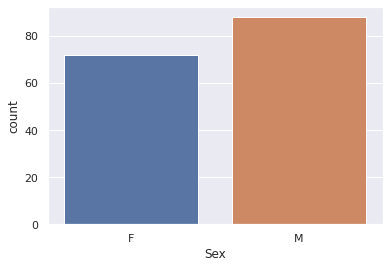

In [20]:
import seaborn 
print(training_data.Sex.value_counts())
seaborn.set_theme(style="darkgrid")
ax = sns.countplot(data=training_data, x="Sex")
plt.show()

4.2    19
3.0    17
4.0    15
3.4    13
4.1    10
4.6     9
2.7     7
4.4     7
2.6     7
2.1     5
3.1     5
4.8     5
2.8     5
3.8     5
3.2     4
3.3     4
2.4     4
3.6     4
4.5     3
3.7     3
2.2     3
4.7     2
4.3     2
3.9     2
Name: Serum_Albumin, dtype: int64


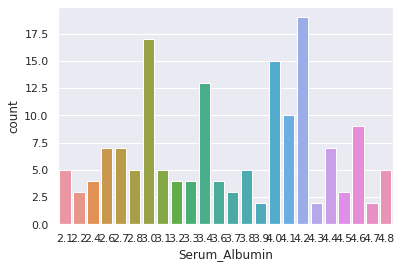

In [21]:
print(training_data.Serum_Albumin.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=training_data, x="Serum_Albumin")
plt.show()

Severe      94
Moderate    52
Mild        14
Name: Stroke_Severity, dtype: int64


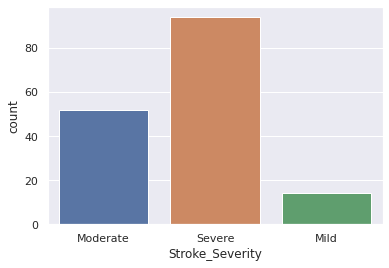

In [22]:
print(training_data.Stroke_Severity.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=training_data, x="Stroke_Severity")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(training_data)
plt.show()

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,11))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
plt.figure(figsize=(14,11))
sns.heatmap(training_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
my_report = sv.analyze([training_data, "Train"])
my_report.show_html('Report.html')

# Exploratory Data Anslysis

In [ ]:
profile = ProfileReport(training_data, title='Pandas Profiling Report', html={'style':{'full_width':False}})

profile.to_notebook_iframe()

# Data Preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Stroke_Severity']= label_encoder.fit_transform(df['Stroke_Severity'])
df['Disability']= label_encoder.fit_transform(df['Disability'])
 
df['Sex'].unique()

In [ ]:
df['Disability'].unique()

In [ ]:
df['Stroke_Severity'].unique()

In [ ]:
df

One Hot Encoding

In [ ]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [12,13])], remainder= 'passthrough')

## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
lgr= ['Logistic Regression', LogisticRegression(random_state=0)]

In [ ]:
svm = ['SVM', SVC(random_state = 0)]

In [ ]:
knn= ['KNeighbors', KNeighborsClassifier()]

In [ ]:
gaus= ['GaussianNB', GaussianNB()]

In [ ]:
bern=['BernoulliNB', BernoulliNB()]

In [ ]:
destree=['Decision Tree', DecisionTreeClassifier(random_state=0)]

In [ ]:
randf=['Random Forest', RandomForestClassifier(random_state=45)]

In [ ]:
xgb=['XGBoost', XGBClassifier(eval_metric= 'error')]

In [ ]:
models = []
models.append(lgr)
models.append(svm)
models.append(knn)
models.append(gaus)
models.append(bern)
models.append(destree)
models.append(randf)
models.append(xgb)

In [ ]:
x_train[0]

In [ ]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [ ]:
df_model = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [ ]:
df_model.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [ ]:
df_model

In [ ]:
df_copy.Stroke_Severity = df_copy.Stroke_Severity.round().astype(int)

# Fine-tuning the existing Models

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0], 'gamma': [ 0.001, 0.01, 0.1, 1]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

In [ ]:
kfold = StratifiedKFold(n_splits=10)
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['linear'], 
                  'gamma': [ 0.001],
                  'C': [0.75]}
#C': 0.75, 'kernel': 'linear', 'random_state': 0
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_
# Best score
gsRFC.best_score_

In [ ]:
# KNN Parameters Tuning
KNN = KNeighborsClassifier()
knn_param_grid = {"metric": ["euclidean"],
                  "n_neighbors": [7],
                  "p":[2],
                  "leaf_size": [5]}
gsKNN = GridSearchCV(KNN, param_grid = knn_param_grid, scoring = 'accuracy',cv = kfold, n_jobs =10)
gsKNN.fit(x_train, y_train)
KNN_best = gsKNN.best_estimator_
gsKNN.best_score_

In [ ]:
# XGB Classifier Parameters Tuning
XGB = XGBClassifier()
xgb_param_grid = {"n_estimators": [200],
                  "eval_metric": ["error"], 
                  "learning_rate": [0.1]}

gsXGB = GridSearchCV(XGB, xgb_param_grid, n_jobs=-4, cv=kfold, scoring='accuracy')
gsXGB.fit(x_train, y_train)
XGB_best = gsXGB.best_estimator_
gsXGB.best_score_


In [ ]:
votingC = VotingClassifier(estimators=[('xgb', XGB_best),('svc', SVMC_best), ('adac',ada_best),('knn',KNN_best),('rfc', RFC_best)], voting='soft', n_jobs=7)

votingC = votingC.fit(x_train, y_train)

In [ ]:

y_pred1 = votingC.predict(x_test)
cm_ens= confusion_matrix(y_test, y_pred1)  #Confusion Matrix
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
roc = roc_auc_score(y_test, y_pred1)  #ROC AUC Score
precision = precision_score(y_test, y_pred1)  #Precision Score
recall = recall_score(y_test, y_pred1)  #Recall Score
f1 = f1_score(y_test, y_pred1)  #F1 Score
print(cm_ens)
print('')
print('Accuracy Score: ',accuracy_score(y_test, y_pred1))
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('')
print('ROC AUC Score: {:.2f}'.format(roc))
print('')
print('Precision: {:.2f}'.format(precision))
print('')
print('Recall: {:.2f}'.format(recall))
print('')
print('F1: {:.2f}'.format(f1))
print('-----------------------------------')
print('')


In [ ]:
cm_ens

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm_ens, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            )



In [ ]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsKNN.best_estimator_,"KNearest Neighbour learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsXGB.best_estimator_,"ExtremeGradientBoosting learning curves",x_train,y_train,cv=kfold)

In [ ]:
lgr1 = LogisticRegression()
lgr1.fit(x_train, y_train)

In [ ]:
from sklearn import metrics
y_pred_proba = lgr1.predict_proba(x_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

%matplotlib inline
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
mod1 = DecisionTreeClassifier(random_state = 46)
mod1.fit(x_train, y_train)

y_pred_proba1 = gsadaDTC.predict_proba(x_test)[::,1]

fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba1)

plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
mod2 = RandomForestClassifier(random_state = 42)
mod2.fit(x_train, y_train)

y_pred_proba2 = gsRFC.predict_proba(x_test)[::,1]

fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba2)

plt.plot(fpr2, tpr2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
mod3 = XGBClassifier(eval_metric = 'error')
mod3.fit(x_train, y_train)

y_pred_proba3 = mod3.predict_proba(x_test)[::,1]

fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_proba3)

plt.plot(fpr3, tpr3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()